# Predicting Housing Prices
### Hands-On Machine Learning with SciKit-Learn, Keras & Tensorflow, 2nd ed. - A. Géron

In [15]:
# Import the dataset into a pandas dataframe

import pandas as pd

housing = pd.read_csv("datasets/housing.csv")


### Data Exploration

In [16]:
# Show information about the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
# Show the categories present within ocean_proximity

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
# Show summary of numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


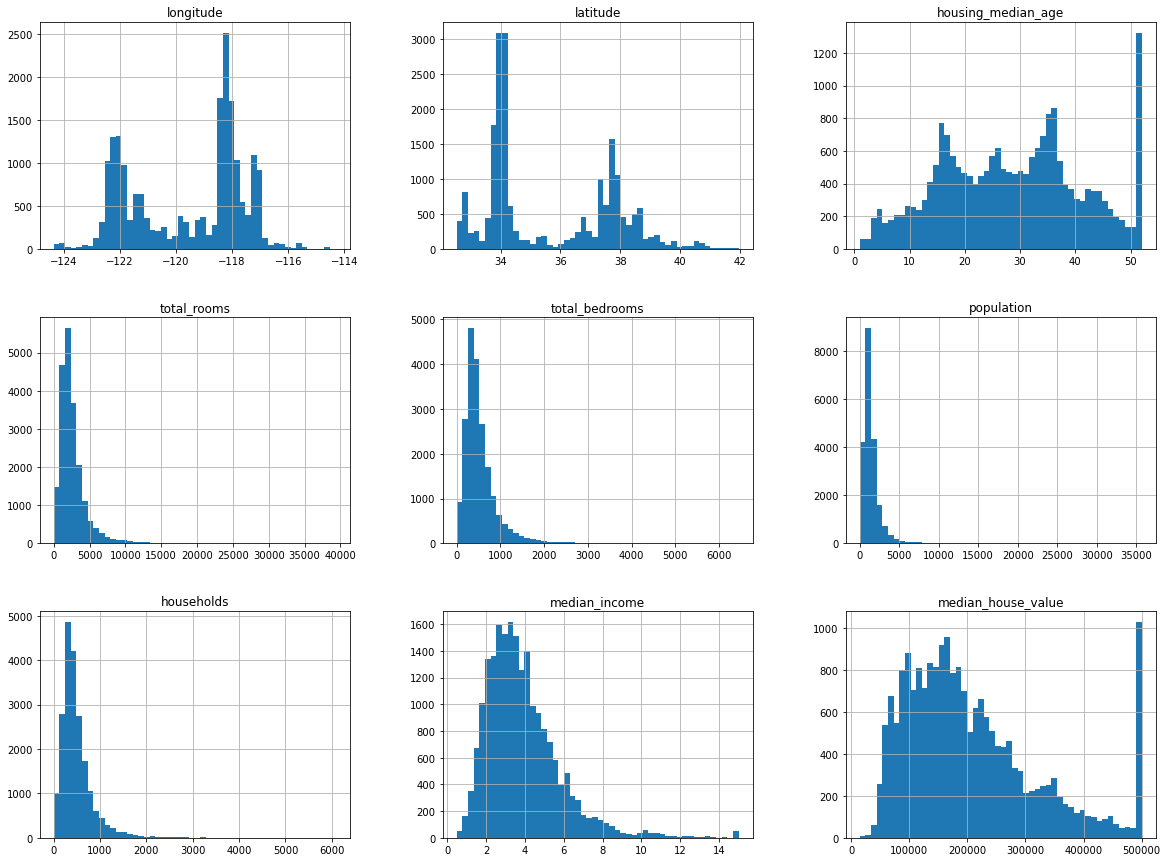

In [19]:
# Plot a histogram of the numerical attributes of the dataset

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

##### Things to keep in mind

- The median income is measured in \\$10,000s and has been capped at \\$150,000
- The housing median age and median house value have also been capped
- These attributes have different scales
- The histograms are tail-heavy

<AxesSubplot:>

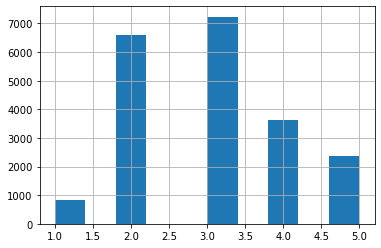

In [21]:
# Add categories to the dataframe that represent median income to allow for stratified sampling
# Then display a histogram of the category distribution

import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

housing['income_cat'].hist()

In [22]:
# Create the training and test sets by stratified sampling, by using the median income categories

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# Return the data to its original state by removing the income_cat attribute

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [24]:
# Create a copy of the training set for exploration purposes

housing = strat_train_set.copy()

<AxesSubplot:title={'center':'The geographical distribution of records in the training set'}, xlabel='longitude', ylabel='latitude'>

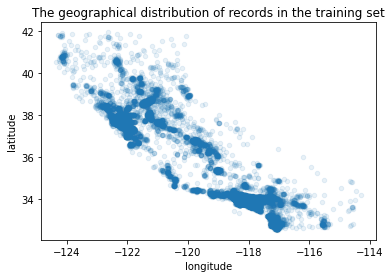

In [31]:
# Visualise the data by using a scatter plot

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, title='The geographical distribution of records in the training set')

<AxesSubplot:title={'center':'House prices and population by geographical region in the training dataset'}, xlabel='longitude', ylabel='latitude'>

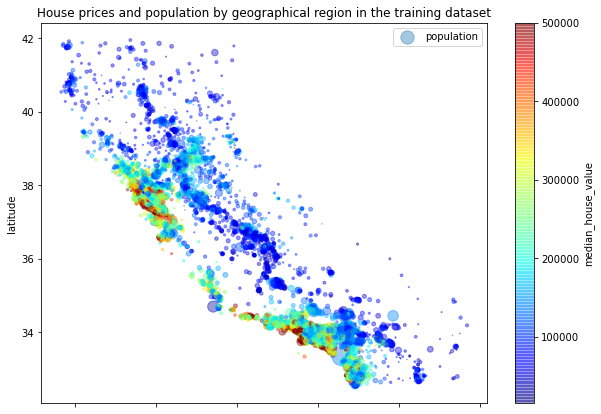

In [33]:
# Create a scatterplot of the housing prices in the training set
# The radius of each circle represents the population
# The colour of each circle represents the price

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            title='House prices and population by geographical region in the training dataset')

Housing prices appear to be related to the location (proximity to the ocean) and population density

In [34]:
# Calculate the standard correlation coefficient between each pair of attributes
# Then output how much each attribute correlates with the median house value in descending order

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

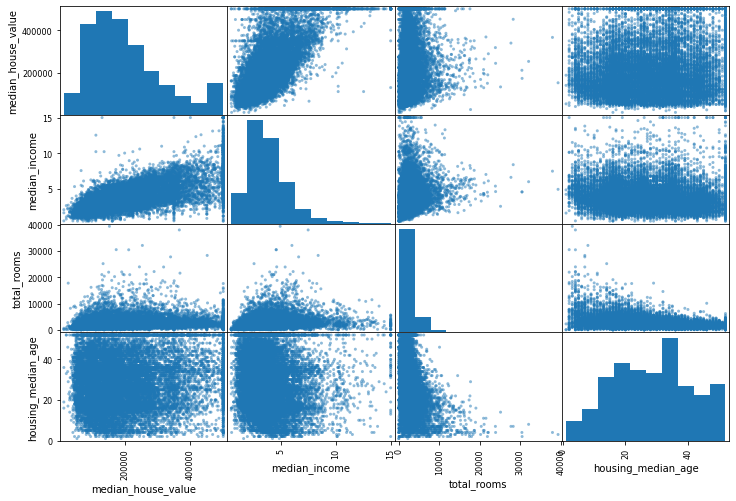

In [40]:
# Plot the attributes that appear to be the most correlated with the median house value

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

The most promising attribute appears to be median income

<AxesSubplot:title={'center':'Correlation between median income and median house value in the training set'}, xlabel='median_income', ylabel='median_house_value'>

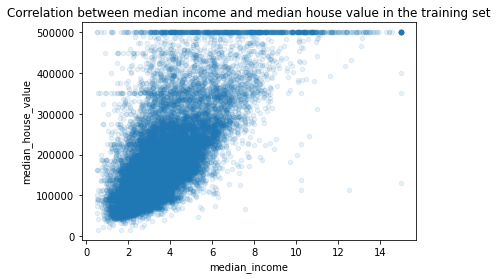

In [42]:
# Plot the median income against the median house value

housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, title='Correlation between median income and median house value in the training set')

- The correlation is strong between these attributes
- The price cap is clearly visible at \\$500,000
- Other straight lines are visible
    - \$450,000
    - $350,000
    - \$280,000?
    - A few below that?
- These may want to be removed to prevent the alogrithm from learning from these quirks

In [43]:
# Create new attributes for 'rooms per household', 'bedrooms per room' and 'population per household'

housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [44]:
# Calculate the correlation matrix again with these new attributes
# Then output the attributes correlation with the median house value

corr_matrix  = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- Bedrooms per room is much more correlated than the total bedrooms or total rooms attribute
- The number of rooms per household is more informative than the number of rooms per district
- Rooms per household is also better correlated than total rooms


In [45]:
# Create a clean training set
# Separate the predictors and labels

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning